In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
df = pd.read_csv('./heart_cleveland_upload.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
# Veri setinin son 5 satırını yazdır
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [ ]:
# Veri setindeki satır ve sütün sayısı
df.shape

(297, 14)

In [ ]:
# Veriler hakkında bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
# Eksik değerleri kontrol etme
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [ ]:
# Verilerle ilgili istatistiksel önlemler
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
# Hedef değişkeni olan condition değişkeninin dağılımını kontrol etme
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

1 --> Kalp Rahatsızlığı Mevcut

0 --> Sağlıklı Kalp

**Özellikleri ve Hedefi Bölme**

In [ ]:
X = df.drop(columns='condition', axis =1)
Y = df['condition']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0    

In [ ]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


**Verileri Train ve Test Verilerine Ayırma**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (237, 13) (60, 13)


In [ ]:
pd.options.mode.chained_assignment = None
df['sex'][df['sex'] == 0] = 'Kadın'
df['sex'][df['sex'] == 1] = 'Erkek' 

df['cp'][df['cp'] == 0] = 'Tipik anjina'
df['cp'][df['cp'] == 1] = 'Atipik angjna'
df['cp'][df['cp'] == 2] = 'Anjin Olmayan Ağrı'
df['cp'][df['cp'] == 3] = 'Asemptomatik'

df['fbs'][df['fbs'] == 0] = '120mg/mlden düşük'
df['fbs'][df['fbs'] == 1] = '120mg/mlden yüksek'

df['restecg'][df['restecg'] == 0] = 'Normal'
df['restecg'][df['restecg'] == 1] = 'ST-T Dalgası Anormalliği'
df['restecg'][df['restecg'] == 2] = 'Sol ventrikül hipertrofisi'

df['exang'][df['exang'] == 0] = 'Hayır'
df['exang'][df['exang'] == 1] = 'Evet'

df['slope'][df['slope'] == 0] = 'Yukarı Eğimli'
df['slope'][df['slope'] == 1] = 'Düz'
df['slope'][df['slope'] == 2] = 'Aşağı Eğimli'

df['thal'][df['thal'] == 0] = 'Normal'
df['thal'][df['thal'] == 1] = 'Sabit Kusur'
df['thal'][df['thal'] == 2] = 'Geri Döndürülebilir Kusur'

df['condition'][df['condition'] == 0] = 'Hayır'
df['condition'][df['condition'] == 1] = 'Evet'

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,Erkek,Tipik anjina,160,234,120mg/mlden yüksek,Sol ventrikül hipertrofisi,131,Hayır,0.1,Düz,1,Normal,Hayır
1,69,Kadın,Tipik anjina,140,239,120mg/mlden düşük,Normal,151,Hayır,1.8,Yukarı Eğimli,2,Normal,Hayır
2,66,Kadın,Tipik anjina,150,226,120mg/mlden düşük,Normal,114,Hayır,2.6,Aşağı Eğimli,0,Normal,Hayır
3,65,Erkek,Tipik anjina,138,282,120mg/mlden yüksek,Sol ventrikül hipertrofisi,174,Hayır,1.4,Düz,1,Normal,Evet
4,64,Erkek,Tipik anjina,110,211,120mg/mlden düşük,Sol ventrikül hipertrofisi,144,Evet,1.8,Düz,0,Normal,Hayır
5,64,Erkek,Tipik anjina,170,227,120mg/mlden düşük,Sol ventrikül hipertrofisi,155,Hayır,0.6,Düz,0,Geri Döndürülebilir Kusur,Hayır
6,63,Erkek,Tipik anjina,145,233,120mg/mlden yüksek,Sol ventrikül hipertrofisi,150,Hayır,2.3,Aşağı Eğimli,0,Sabit Kusur,Hayır
7,61,Erkek,Tipik anjina,134,234,120mg/mlden düşük,Normal,145,Hayır,2.6,Düz,2,Normal,Evet
8,60,Kadın,Tipik anjina,150,240,120mg/mlden düşük,Normal,171,Hayır,0.9,Yukarı Eğimli,0,Normal,Hayır
9,59,Erkek,Tipik anjina,178,270,120mg/mlden düşük,Sol ventrikül hipertrofisi,145,Hayır,4.2,Aşağı Eğimli,0,Geri Döndürülebilir Kusur,Hayır


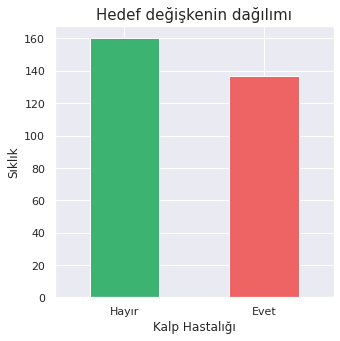

In [ ]:
sns.set(style="darkgrid")
df.condition.value_counts().plot(kind="bar",figsize=(5,5),color=['#3CB371','#EE6363'])
plt.title('Hedef değişkenin dağılımı',fontsize=15)
plt.xlabel('Kalp Hastalığı',fontsize=12)
plt.ylabel('Sıklık',fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
countNoDisease = len(df[df.condition == "Hayır"])
countHaveDisease = len(df[df.condition == "Evet"])
print("Kalp Hastalığı Olmayan Hastaların Yüzdesi: {:.2f}%".format((countNoDisease / (len(df.condition)) * 100)))
print("Kalp Hastalığı Olan Hastaların Yüzdesi: {:.2f}%".format((countHaveDisease / (len(df.condition)) * 100)))

Kalp Hastalığı Olmayan Hastaların Yüzdesi: 53.87%
Kalp Hastalığı Olan Hastaların Yüzdesi: 46.13%


Veri Setimiz Dengeli.

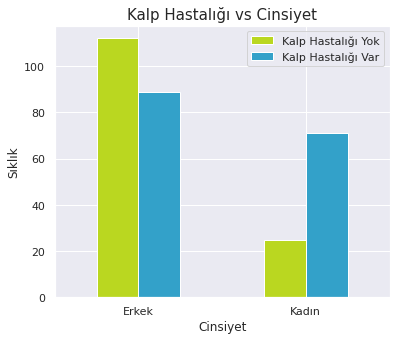

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.sex,df.condition).plot(kind="bar",figsize=(6,5),color=['#BAD720',"#33A1C9"])
plt.title('Kalp Hastalığı vs Cinsiyet',fontsize=15)
plt.xlabel('Cinsiyet',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Kalp Hastalığı Yok", "Kalp Hastalığı Var"])
plt.ylabel('Sıklık',fontsize=12)
plt.show()

Erkeklerde kalp hastalığı, kadınlara oranla daha fazladır.

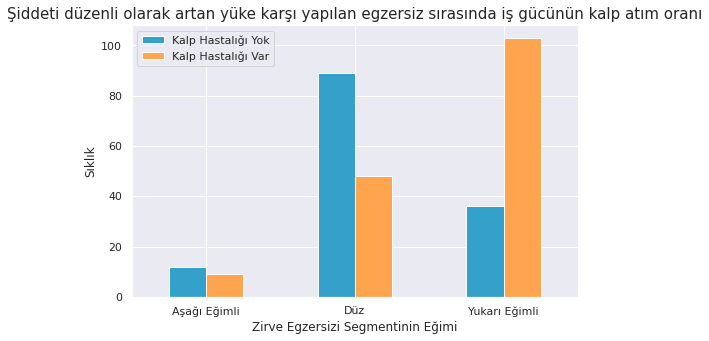

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.slope, df.condition).plot(kind="bar", figsize=(8,5), color=["#33A1C9", "#FFA54F"], ax=plt.gca())
plt.legend(["Kalp Hastalığı Yok", "Kalp Hastalığı Var"])
plt.title("Şiddeti düzenli olarak artan yüke karşı yapılan egzersiz sırasında iş gücünün kalp atım oranı",fontsize=15)
plt.xlabel("Zirve Egzersizi Segmentinin Eğimi",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Aşağı Eğimli","Düz","Yukarı Eğimli"])
plt.ylabel("Sıklık",fontsize=12)
plt.show()

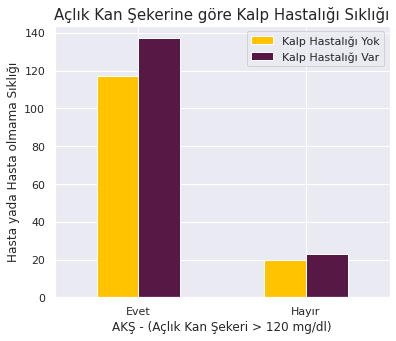

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.fbs, df.condition).plot(kind="bar", figsize=(6,5), color=["#FFC300", "#581845"], ax=plt.gca())
plt.title("Açlık Kan Şekerine göre Kalp Hastalığı Sıklığı",fontsize=15)
plt.legend(["Kalp Hastalığı Yok", "Kalp Hastalığı Var"])
plt.xlabel("AKŞ - (Açlık Kan Şekeri > 120 mg/dl)",fontsize=12)
plt.gca().set_xticklabels(labels=["Evet", "Hayır"])
plt.xticks(rotation=0)
plt.ylabel("Hasta yada Hasta olmama Sıklığı",fontsize=12)
plt.show()

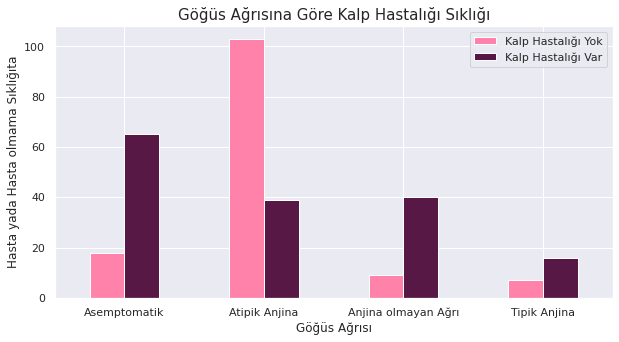

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.cp, df.condition).plot(kind="bar", figsize=(10, 5), color=["#FF82AB", "#581845"], ax=plt.gca())
plt.title("Göğüs Ağrısına Göre Kalp Hastalığı Sıklığı",fontsize=15)
plt.legend(["Kalp Hastalığı Yok", "Kalp Hastalığı Var"])
plt.xlabel("Göğüs Ağrısı",fontsize=12)
plt.gca().set_xticklabels(
    labels=["Asemptomatik","Atipik Anjina","Anjina olmayan Ağrı","Tipik Anjina"]
)
plt.xticks(rotation=0)
plt.ylabel("Hasta yada Hasta olmama Sıklığıta",fontsize=12)
plt.show()

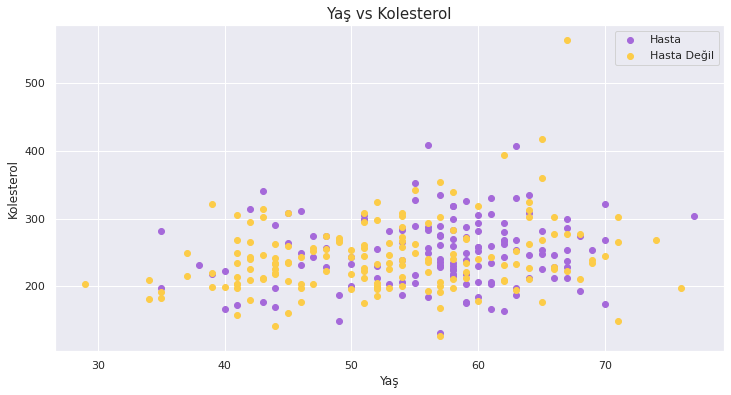

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df.age[df.condition=='Evet'], df.chol[df.condition=='Evet'],color='#A569DA')
plt.scatter(df.age[df.condition=='Hayır'], df.chol[df.condition=='Hayır'],color='#FCCC49')

plt.title('Yaş vs Kolesterol',fontsize=15)
plt.xlabel('Yaş',fontsize=12)
plt.ylabel('Kolesterol',fontsize=12)
plt.legend(['Hasta','Hasta Değil']);

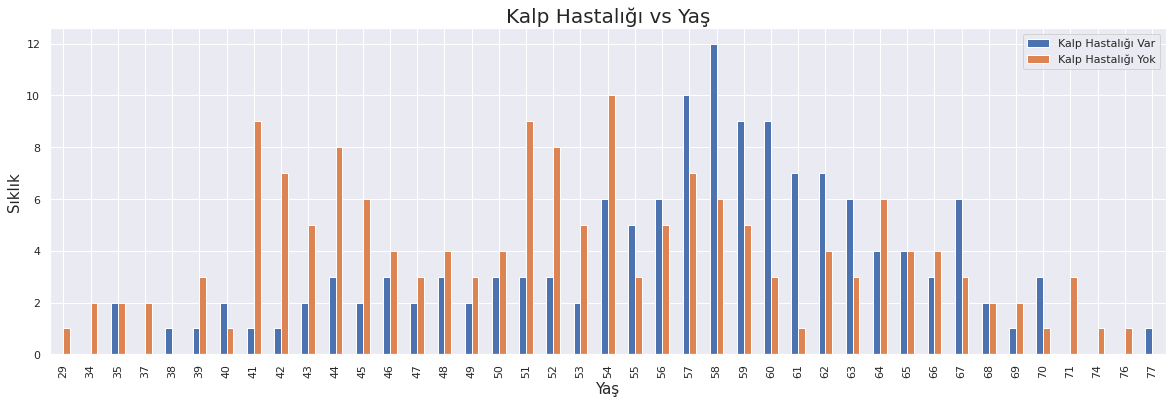

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.age, df.condition).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Kalp Hastalığı vs Yaş",fontsize=20)
plt.legend(["Kalp Hastalığı Var", "Kalp Hastalığı Yok"])
plt.xlabel("Yaş",fontsize=15)
plt.ylabel("Sıklık",fontsize=15)
plt.show()

**Hastanın yaşı arttıkça kalp hastalığına yakalanma olasılığı da artmaktadır.**

**Model Eğitimi**

Lojistik Regrasyon

In [ ]:
accuracies = {}

model = LogisticRegression()

In [ ]:
# Lojistik Regrasyon modelinin Train Data ile eğitilmesi
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc = model.score(X_test, Y_test) * 100
accuracies["Lojistik Regrasyon"] = acc

In [ ]:
print(classification_report(y_train_pred, Y_train))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       140
           1       0.79      0.89      0.83        97

    accuracy                           0.86       237
   macro avg       0.85      0.86      0.85       237
weighted avg       0.86      0.86      0.86       237



In [ ]:
print(classification_report(y_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.86      0.92      0.89        26

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



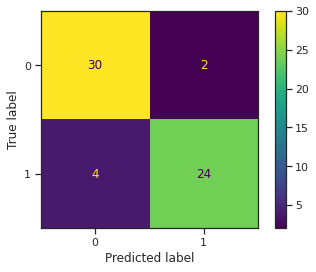

In [ ]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
plt.show()

**Model Değerlendirmesi**

Accuracy Sonucu

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Training Datası Accuracy Sonucu : ', training_data_accuracy)

Training Datası Accuracy Sonucu :  0.8565400843881856


In [ ]:
# Test Datası için Accuracy 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Test Datası Accuracy Sonucu : ', test_data_accuracy)

Test Datası Accuracy Sonucu :  0.9


**Tahmin Sistemi Oluşturma**

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# input verilerini numpy dizisiyle değiştir
input_data_as_numpy_array= np.asarray(input_data)

# numpy dizisini yalnızca örnek için tahmin ettiğimiz gibi yeniden şekillendir
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Bu kişi kalp hastası değildir.')
else:
  print('Bu kişi kalp hastasıdır.')

[1]
Bu kişi kalp hastasıdır.


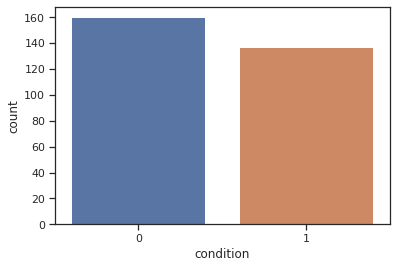

In [ ]:
sns.countplot(x='condition', data=df)

In [ ]:
# Korelasyon kontrol
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


KNN Algoritması

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, Y_train)
y_train_pred1 = knn.predict(X_train)
y_test_pred1 = knn.predict(X_test)

In [ ]:
y_train_pred1 = knn.predict(X_train)
y_test_pred1 = knn.predict(X_test)

print(classification_report(y_train_pred1, Y_train))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       183
           1       0.50      1.00      0.66        54

    accuracy                           0.77       237
   macro avg       0.75      0.85      0.74       237
weighted avg       0.89      0.77      0.79       237



In [ ]:
print(classification_report(y_test_pred1,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68        44
           1       0.36      0.62      0.45        16

    accuracy                           0.60        60
   macro avg       0.58      0.61      0.57        60
weighted avg       0.69      0.60      0.62        60



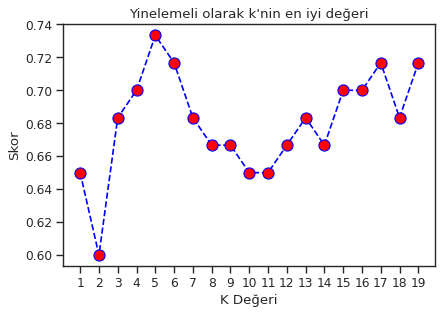

Maksimum KNN Test Accuracy 73.33%  K = 5


In [ ]:
# En iyi k değeri
scoreList = []
for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors = k
    knn1.fit(X_train, Y_train)
    scoreList.append(knn1.score(X_test, Y_test))

plt.figure(dpi=80)
plt.plot(range(1, 20), scoreList,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xticks(np.arange(1, 20, 1))
plt.title("Yinelemeli olarak k'nin en iyi değeri")
plt.xlabel("K Değeri")
plt.ylabel("Skor")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN"] = acc
print("Maksimum KNN Test Accuracy {:.2f}%".format(acc)," K =",scoreList.index(max(scoreList))+1)

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=4) 
knn2.fit(X_train, Y_train)
y_train_pred1 = knn2.predict(X_train)
y_test_pred1 = knn2.predict(X_test)

In [ ]:
print(classification_report(y_train_pred1, Y_train))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80       173
           1       0.51      0.88      0.65        64

    accuracy                           0.74       237
   macro avg       0.73      0.78      0.72       237
weighted avg       0.82      0.74      0.76       237



In [ ]:
print(classification_report(y_test_pred1, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        42
           1       0.50      0.78      0.61        18

    accuracy                           0.70        60
   macro avg       0.69      0.72      0.68        60
weighted avg       0.76      0.70      0.71        60



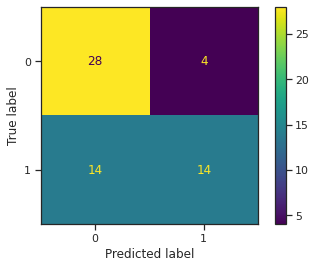

In [ ]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn2, X_test, Y_test)
plt.show()

SVM Algoritması

In [ ]:
# SVM Model Oluşturma

svm = SVC()
svm.fit(X_train, Y_train)
y_test_pred2 = svm.predict(X_test)

In [ ]:
print(classification_report(y_test_pred2,Y_test))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        38
           1       0.61      0.77      0.68        22

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.76      0.73      0.74        60



In [ ]:
# SVM için hiperparametre ayarı
param_tuned= {'C': [0.1,1,5,10,100], 'gamma': [1,0.1,0.01,0.001,0.005,0.0001, 0.0005],'kernel': ['poly','rbf', 'sigmoid','linear']}
 
grid = RandomizedSearchCV(svm, param_tuned, scoring='accuracy', cv = 5)
 
grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 5, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.005,
                                                  0.0001, 0.0005],
                                        'kernel': ['poly', 'rbf', 'sigmoid',
                                                   'linear']},
                   scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}


In [ ]:
svm1 = SVC(C=5, gamma= 0.01, kernel= 'linear')
svm1.fit(X_train, Y_train)
y_train_pred4 = svm1.predict(X_train)
y_test_pred4 = svm1.predict(X_test)

acc = svm1.score(X_test, Y_test) * 100
accuracies["SVM"] = acc

In [ ]:
print(classification_report(y_train_pred4,Y_train))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       137
           1       0.80      0.87      0.83       100

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.86      0.85      0.85       237



In [ ]:
print(classification_report(y_test_pred4,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.87        27

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



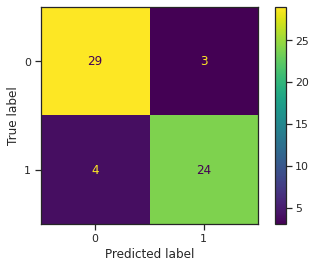

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm1, X_test, Y_test)
plt.show()

**Naive Bayes Algoritması**

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_train_pred3 = nb.predict(X_train)
y_test_pred3 = nb.predict(X_test)

acc = nb.score(X_test, Y_test) * 100
accuracies["Naive Bayes Algoritması"] = acc

In [ ]:
print(classification_report(y_train_pred3,Y_train))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       129
           1       0.83      0.83      0.83       108

    accuracy                           0.84       237
   macro avg       0.84      0.84      0.84       237
weighted avg       0.84      0.84      0.84       237



In [ ]:
print(classification_report(y_test_pred3,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.87        27

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



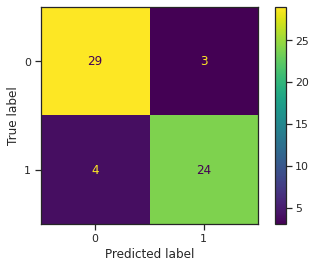

In [ ]:
ConfusionMatrixDisplay.from_estimator(nb, X_test, Y_test)
plt.show()

**Model Karşılaştırma**

<Figure size 720x480 with 0 Axes>

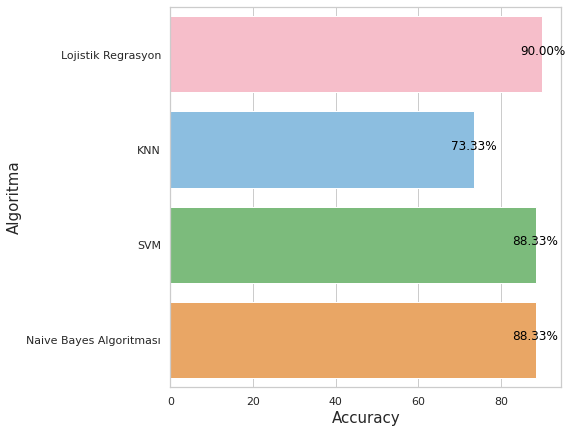

In [ ]:
colors = ["#FFB5C5", "#7EC0EE", "#71C671", "#FFA54F"]

sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Algoritma",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
g = sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), palette=colors, orient="h")
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()
